# Nonlinear PDEs, Inviscid Burgers Equation

In this notebook, we explore numerical solutions to the one dimensional, inviscid Burgers equation. This equation is a first order, nonlinear hyperbolic PDE. The Burgers equation can describe the development of a shock wave or discontinuity, or any wave where one part of the wave is travelling faster than another part of the wave. 

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0 $$

where $u(x,t)$ is the propagation velocity of the disturbance. 

The numerical scheme implemented below is the Lax approximation for the temporal derivative, and the leap frog approximation for the spatial derivative.

***

## Homework 3
Review the code below. Modify $dt$ and $dx$, and thus $S$ over the range of 0 to 1. Describe changes in the wave front at the end time $T$ in terms of both steepness and $x$ position. What does that mean for the numerical dispersion and diffusion present in the Lax scheme implemented below?

In [33]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

In [23]:
# define the solution space
x0 = 0
xL = 1
L = xL-x0

# define the spatial discretization
n = 999
dx = L/(n+1)
x = np.arange(x0+dx,xL,dx)

# define the temporal discretization
T = 1
#dt = dx/5
dt = dx
m = int(T/dt)

# initial conditions
t0 = 0
u0 = np.exp(-10*((4*x-1)**2))

# define Courant numbers
S = dt/dx
print('dt =', dt)
print('dx =', dx)
print('S = ',S)

dt = 0.001
dx = 0.001
S =  1.0


Since the matrix $A$ and vector $B$ in our typical numerical solution has terms that depend on $u_{j}^{k}$, we will define $A$ and $B$ below within the timestepping routine. Since both of the boundary conditions $u_{0}^{k}$ and $u_{n+1}^{k}$ are 0, the vector $B$ is not updated below.

In [24]:
# initialize the matrices
A = np.zeros((n,n))
B = np.zeros((n, 1))

u = np.empty((m, n))
u[0, :] = u0
u_xt = u0
t = np.zeros((m))
t[0] = t0

In [25]:
for i in range(m-1):
    Asup = np.diag(1-(S*u_xt[:-1]), k=1)
    Asub = np.diag(1+(S*u_xt[1:]), k=-1)
    A = Asup+Asub
    
    u_n = 0.5*(np.matmul(A, u_xt[:, np.newaxis]) + B)
    u[i+1, :] = u_n.flatten()
    u_xt = u_n.flatten()
    t[i+1] = t[i] + dt

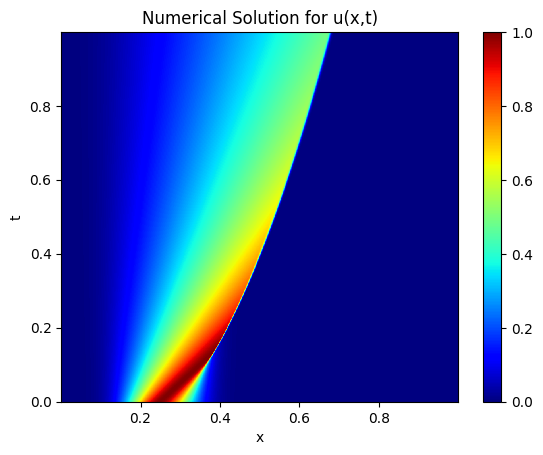

In [26]:
fig, ax = plt.subplots(1)
c = ax.pcolormesh(x, t, u, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('Numerical Solution for u(x,t)')
plt.colorbar(c)